# DS 5500 Homework 4 Solutions

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
import seaborn as sns

In [2]:
fiscal_data_file_path = 'data_files/Sdf16_1a.txt'
fiscal_data = pd.read_csv(fiscal_data_file_path, sep = '\t', low_memory=False)

In [3]:
demographics_data_file_path = 'data_files/ccd_lea_052_1516_w_1a_011717.csv'
demographics_data = pd.read_csv(demographics_data_file_path, low_memory=False)
demographics_data['LEAID'] = demographics_data['LEAID'].astype(str)
for sch_id in demographics_data['LEAID']:
    if len(sch_id) == 6:
        demographics_data.loc[(demographics_data['LEAID'] == sch_id), 'LEAID'] = '0' + sch_id

In [4]:
disabilities_data_file_path = 'data_files/ccd_lea_002089_1516_w_1a_011717.csv'
disabilities_data = pd.read_csv(disabilities_data_file_path, low_memory=False)
disabilities_data['LEAID'] = disabilities_data['LEAID'].astype(str)
for sch_id in disabilities_data['LEAID']:
    if len(sch_id) == 6:
        disabilities_data.loc[(disabilities_data['LEAID'] == sch_id), 'LEAID'] = '0' + sch_id

## Problem 1

In [5]:
fiscal_data = fiscal_data[fiscal_data.TFEDREV.notnull()]
fiscal_data = fiscal_data[fiscal_data.TFEDREV > 0]
initial_federal_budget = fiscal_data.TFEDREV.sum()
total_deduction_amount = initial_federal_budget * 0.15
final_federal_budget = initial_federal_budget * 0.85

print('Total school districts: ' + str(len(fiscal_data['NAME'])))
print('Total federal budget allocated before deduction: $' + str(initial_federal_budget))
print('Total federal budget to be deducted: $' + str(total_deduction_amount))
print('Total federal budget allocated after deduction: $' + str(final_federal_budget))

Total school districts: 16539
Total federal budget allocated before deduction: $55602742000
Total federal budget to be deducted: $8340411300.0
Total federal budget allocated after deduction: $47262330700.0


In [6]:
revenue_data = fiscal_data[['LEAID', 'NAME', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV']]
revenue_data = revenue_data[revenue_data.TSTREV.notnull()]
revenue_data = revenue_data[revenue_data.TSTREV >= 0]
revenue_data = revenue_data[revenue_data.TLOCREV.notnull()]
revenue_data = revenue_data[revenue_data.TLOCREV >= 0]

revenue_data['total_other_revenue'] = revenue_data.TSTREV + revenue_data.TLOCREV
revenue_data = revenue_data.sort_values('total_other_revenue', ascending = False).reset_index()

revenue_data['amount_deducted'] = [0] * revenue_data.TFEDREV.shape[0]
revenue_data['final_federal_funding'] = revenue_data.TFEDREV

for index in range(revenue_data.shape[0]):
    deduction_amount = revenue_data.TFEDREV[index] * 0.25
    if total_deduction_amount < deduction_amount:
        revenue_data.amount_deducted[index] = total_deduction_amount
        revenue_data.final_federal_funding[index] = revenue_data.TFEDREV[index] - total_deduction_amount
        print('number of school districts for which federal funding is deducted: ' + str(index + 1))
        break
    else:
        total_deduction_amount -= deduction_amount
        revenue_data.amount_deducted[index] = deduction_amount
        revenue_data.final_federal_funding[index] = revenue_data.TFEDREV[index] - deduction_amount
        
revenue_data = revenue_data.rename(columns = {'TFEDREV': 'initial_federal_funding', 'TOTALREV': 'initial_total_funding'})
revenue_data['Proportion_to_be_cut'] = revenue_data['amount_deducted'] / revenue_data['initial_total_funding']
revenue_data['final_total_funding'] = revenue_data['initial_total_funding'] - revenue_data['amount_deducted']
revenue_data = revenue_data.drop(columns = ['index', 'TSTREV', 'TLOCREV', 'total_other_revenue','initial_federal_funding', 'final_federal_funding'])
revenue_data = revenue_data.sort_values('Proportion_to_be_cut', ascending = False).reset_index()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


number of school districts for which federal funding is deducted: 1352


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
revenue_data = revenue_data.drop(columns = ['index'])
revenue_data[:10]

,LEAID,NAME,initial_total_funding,amount_deducted,Proportion_to_be_cut,final_total_funding
0,0691078,Los Angeles County Office of Education,721272000,64569000,0.089521,656703000
1,0691021,Monterey County Office of Education,149637000,10531000,0.070377,139106000
2,0691045,Tulare County Office of Education,217216000,14571250,0.067082,202644750
3,0691035,Santa Clara County Office of Education,279944000,18606750,0.066466,261337250
4,5301410,Clover Park School District,214417000,14024750,0.065409,200392250
5,2680400,Genesee ISD,137747000,8346250,0.060591,129400750
6,0691041,Stanislaus County Office of Education,206014000,12331000,0.059855,193683000
7,3604870,BINGHAMTON CITY SCHOOL DISTRICT,144295000,8386500,0.058121,135908500
8,4825660,KILLEEN ISD,439981000,25520750,0.058004,414460250
9,2612000,Detroit City School District,838553000,48476250,0.057809,790076750


(array([15525,   428,   348,   150,    63,    13,     7,     4,     0,
           1]), array([0.        , 0.0089521 , 0.0179042 , 0.0268563 , 0.03580841,
       0.04476051, 0.05371261, 0.06266471, 0.07161681, 0.08056891,
       0.08952101]))


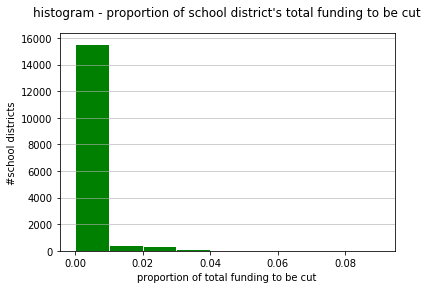

In [8]:
print(np.histogram(revenue_data['Proportion_to_be_cut']))
plt.hist(revenue_data['Proportion_to_be_cut'], bins = np.arange(0, 0.1, 0.01), facecolor = 'g', edgecolor = 'w')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('proportion of total funding to be cut')
plt.ylabel('#school districts')
plt.title('histogram - proportion of school district\'s total funding to be cut', y = 1.05)
plt.savefig('solution_figures/prob1.png')

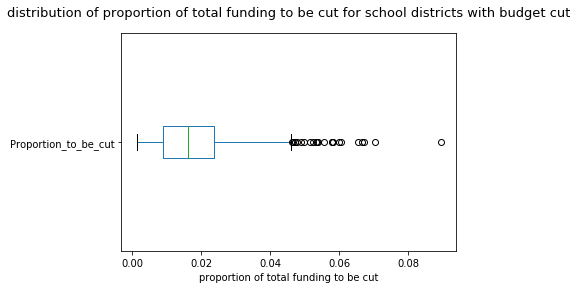

In [9]:
revenue_data['Proportion_to_be_cut'][(revenue_data['Proportion_to_be_cut'] != 0)].plot(kind = 'box', vert=False)
plt.xlabel('proportion of total funding to be cut')
plt.title('distribution of proportion of total funding to be cut for school districts with budget cut', size = 13, y = 1.05)
plt.savefig('solution_figures/prob1_boxplot.png')

## Problem 2

In [10]:
demographics_data = demographics_data[(demographics_data['TOTAL'] >= 0)]
school_race_proportion = pd.DataFrame(demographics_data['LEAID'])
school_race_proportion['American Indian/Alaska Native'] = demographics_data['AM'] / demographics_data['TOTAL']
school_race_proportion['Asian'] = demographics_data['AS'] / demographics_data['TOTAL']
school_race_proportion['Hispanic'] = demographics_data['HI'] / demographics_data['TOTAL']
school_race_proportion['Black'] = demographics_data['BL'] / demographics_data['TOTAL']
school_race_proportion['White'] = demographics_data['WH'] / demographics_data['TOTAL']
school_race_proportion['Hawaiian Native / Pacific Islander'] = demographics_data['HP'] / demographics_data['TOTAL']
school_race_proportion['Two or More Races'] = demographics_data['TR'] / demographics_data['TOTAL']
school_race_proportion = school_race_proportion.fillna(0)

In [11]:
school_race_proportion

,LEAID,American Indian/Alaska Native,Asian,Hispanic,Black,White,Hawaiian Native / Pacific Islander,Two or More Races
1,0100005,0.002685,0.003260,0.439010,0.029152,0.502301,0.000767,0.022823
2,0100006,0.004614,0.003017,0.205856,0.008873,0.768589,0.000355,0.008696
3,0100007,0.000719,0.066930,0.072466,0.254565,0.584543,0.001006,0.019770
4,0100008,0.006193,0.086105,0.043852,0.203976,0.617920,0.002697,0.039257
6,0100011,0.001050,0.006824,0.126509,0.227297,0.602625,0.002625,0.033071
...,...,...,...,...,...,...,...,...
17588,6300026,0.004536,0.176781,0.154836,0.115606,0.299620,0.018879,0.215030
17589,6600002,0.000487,0.230298,0.001525,0.001460,0.005970,0.739918,0.020343
17590,7200030,0.000835,0.000142,0.997449,0.000192,0.001314,0.000068,0.000000
17591,7800002,0.000610,0.003507,0.278701,0.699954,0.011892,0.000915,0.004421


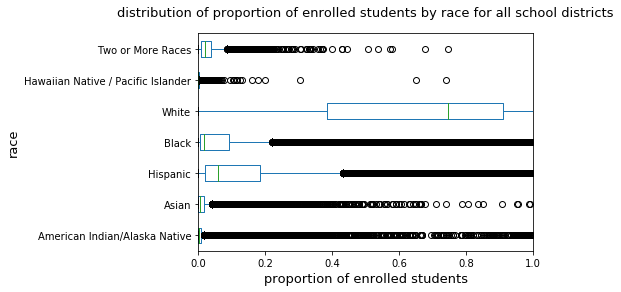

In [12]:
school_race_proportion.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('race', size = 13)
plt.title('distribution of proportion of enrolled students by race for all school districts', size = 13, y = 1.05)
plt.savefig('solution_figures/prob2.png')

In [13]:
school_budget_cut = revenue_data['LEAID'].loc[revenue_data['amount_deducted'] > 0].reset_index()
school_no_budget_cut = revenue_data['LEAID'].loc[revenue_data['amount_deducted'] == 0].reset_index()

In [14]:
school_budget_cut_by_race = pd.merge(school_budget_cut, 
                              school_race_proportion,
                              on = 'LEAID',
                              how = 'left').drop(columns = ['index'])

In [15]:
school_no_budget_cut_by_race = pd.merge(school_no_budget_cut, 
                              school_race_proportion,
                              on = 'LEAID',
                              how = 'left').drop(columns = ['index'])

In [16]:
school_budget_cut_by_race[:10]

,LEAID,American Indian/Alaska Native,Asian,Hispanic,Black,White,Hawaiian Native / Pacific Islander,Two or More Races
0,0691078,0.004033,0.033563,0.668531,0.170938,0.098998,0.001431,0.022506
1,0691021,0.005147,0.035512,0.542975,0.017499,0.311374,0.002059,0.085435
2,0691045,0.006787,0.022624,0.561086,0.021116,0.355204,0.003017,0.030166
3,0691035,0.003705,0.171561,0.598888,0.026679,0.124595,0.003705,0.070866
4,5301410,0.005149,0.044855,0.314689,0.123801,0.338014,0.042983,0.130509
5,2680400,0.003184,0.004342,0.037916,0.449493,0.474674,0.001447,0.028944
6,0691041,0.006432,0.032590,0.481132,0.042882,0.384220,0.001715,0.051029
7,3604870,0.002592,0.031801,0.128759,0.263913,0.475976,-0.000173,0.096958
8,4825660,0.006242,0.024088,0.288571,0.340677,0.249526,0.017245,0.073651
9,2612000,0.002124,0.015102,0.135082,0.822657,0.021838,0.000751,0.002446


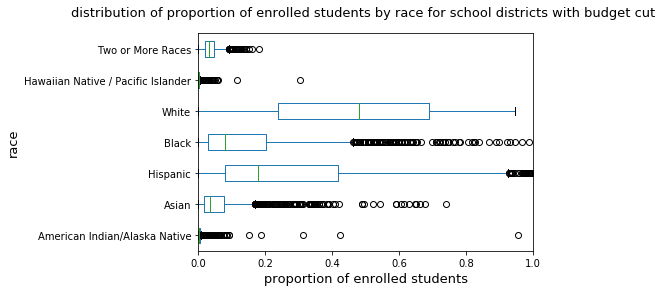

In [17]:
school_budget_cut_by_race.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('race', size = 13)
plt.title('distribution of proportion of enrolled students by race for school districts with budget cut ', size = 13, y = 1.05)
plt.savefig('solution_figures/prob2_budget_cut.png')

In [18]:
school_no_budget_cut_by_race[:10]

,LEAID,American Indian/Alaska Native,Asian,Hispanic,Black,White,Hawaiian Native / Pacific Islander,Two or More Races
0,3100125,0.007576,0.007576,0.064394,0.000000,0.912879,0.000000,0.007576
1,2711220,0.007463,0.007463,0.194030,0.002488,0.763682,0.000000,0.024876
2,4006810,0.063830,0.000000,0.052224,0.013540,0.847195,0.001934,0.021277
3,2706300,0.002481,0.012407,0.037221,0.002481,0.930521,0.000000,0.014888
4,3023940,0.054007,0.006969,0.036585,0.026132,0.872822,0.003484,0.000000
5,4800200,0.001942,0.000000,0.836893,0.036893,0.112621,0.001942,0.009709
6,3700050,0.007092,0.015603,0.028369,0.154610,0.764539,0.000000,0.029787
7,3100124,0.000000,0.005076,0.035533,0.000000,0.954315,0.000000,0.005076
8,2012630,0.002525,0.000000,0.030303,0.012626,0.949495,0.002525,0.002525
9,4500010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


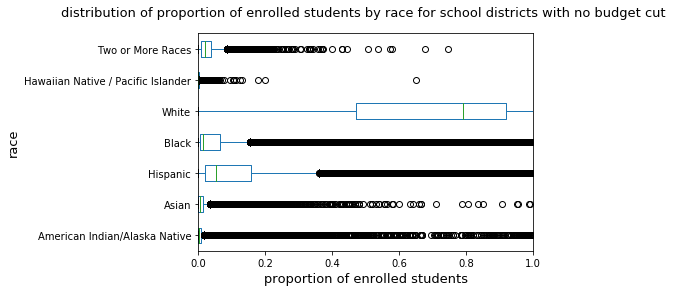

In [19]:
school_no_budget_cut_by_race.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('race', size = 13)
plt.title('distribution of proportion of enrolled students by race for school districts with no budget cut ', size = 13, y = 1.05)
plt.savefig('solution_figures/prob2_no_budget_cut.png')

## Problem 3

In [20]:
disabilities_data_prop = pd.merge(disabilities_data,
                                  demographics_data,
                                  on = 'LEAID',
                                  how = 'left')
disabilities_data_prop = disabilities_data_prop[['LEAID', 'TOTAL', 'SPECED']]
disabilities_data_prop = disabilities_data_prop[(disabilities_data_prop['TOTAL'] > 0) & (disabilities_data_prop['SPECED'] >= 0)]
disabilities_data_prop['prop_disabled'] = disabilities_data_prop['SPECED'] / disabilities_data_prop['TOTAL']
disabilities_data_prop['prop_not_disabled'] = 1 - disabilities_data_prop['prop_disabled']
disabilities_data_prop = disabilities_data_prop.fillna(0).drop(columns = ['TOTAL', 'SPECED'])

In [21]:
disabilities_data_prop[:10]

,LEAID,prop_disabled,prop_not_disabled
1,0100005,0.051208,0.948792
2,0100006,0.076309,0.923691
3,0100007,0.061898,0.938102
4,0100008,0.073419,0.926581
6,0100011,0.089764,0.910236
7,0100012,0.051948,0.948052
8,0100013,0.047801,0.952199
21,0100030,0.099936,0.900064
36,0100060,0.088825,0.911175
37,0100090,0.068128,0.931872


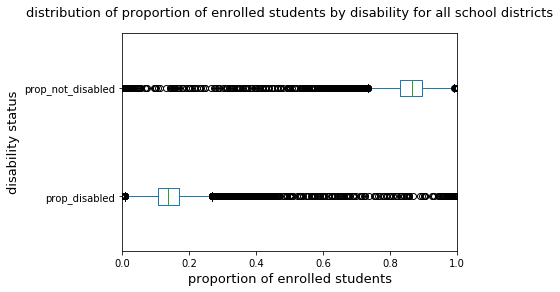

In [22]:
disabilities_data_prop.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('disability status', size = 13)
plt.title('distribution of proportion of enrolled students by disability for all school districts', size = 13, y = 1.05)
plt.savefig('solution_figures/prob3.png')

In [23]:
school_budget_cut = revenue_data['LEAID'].loc[revenue_data['amount_deducted'] > 0].reset_index()
school_no_budget_cut = revenue_data['LEAID'].loc[revenue_data['amount_deducted'] == 0].reset_index()
school_budget_cut_by_dis = pd.merge(school_budget_cut, 
                              disabilities_data_prop,
                              on = 'LEAID',
                              how = 'left').drop(columns = ['index'])
school_no_budget_cut_by_dis = pd.merge(school_no_budget_cut, 
                              disabilities_data_prop,
                              on = 'LEAID',
                              how = 'left').drop(columns = ['index'])

In [24]:
school_budget_cut_by_dis[:10]

,LEAID,prop_disabled,prop_not_disabled
0,0691078,0.012359,0.987641
1,0691021,0.077200,0.922800
2,0691045,0.044495,0.955505
3,0691035,0.069755,0.930245
4,5301410,0.136360,0.863640
5,2680400,0.245441,0.754559
6,0691041,0.015866,0.984134
7,3604870,0.171275,0.828725
8,4825660,0.110823,0.889177
9,2612000,0.174661,0.825339


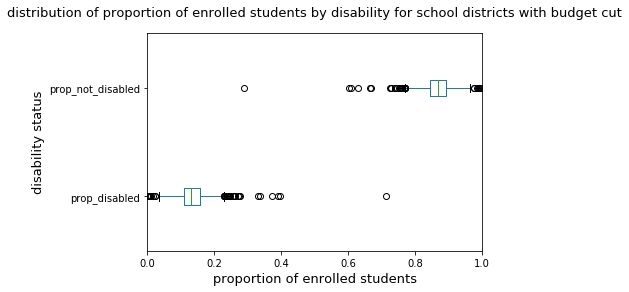

In [25]:
school_budget_cut_by_dis.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('disability status', size = 13)
plt.title('distribution of proportion of enrolled students by disability for school districts with budget cut', size = 13, y = 1.05)
plt.savefig('solution_figures/prob3_budget_cut.png')

In [26]:
school_no_budget_cut_by_dis[:10]

,LEAID,prop_disabled,prop_not_disabled
0,3100125,0.174242,0.825758
1,2711220,0.116915,0.883085
2,4006810,0.116054,0.883946
3,2706300,0.104218,0.895782
4,3023940,0.155052,0.844948
5,4800200,0.112621,0.887379
6,3700050,0.073759,0.926241
7,3100124,0.182741,0.817259
8,2012630,0.282828,0.717172
9,4500010,NaN,NaN


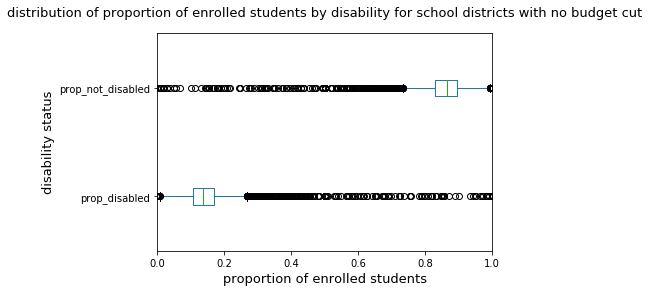

In [27]:
school_no_budget_cut_by_dis.plot(kind = 'box', vert=False)
plt.xlim(0, 1)
plt.xlabel('proportion of enrolled students', size = 13)
plt.ylabel('disability status', size = 13)
plt.title('distribution of proportion of enrolled students by disability for school districts with no budget cut', size = 13, y = 1.05)
plt.savefig('solution_figures/prob3_no_budget_cut.png')